In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 66% 40.0M/60.3M [00:00<00:00, 218MB/s]
100% 60.3M/60.3M [00:00<00:00, 181MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,

        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 22968 images belonging to 7 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 5741 images belonging to 7 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 7178 images belonging to 7 classes.


(48, 48, 3)
(1, 48, 48, 3)


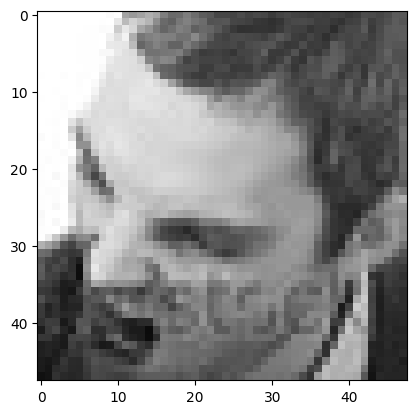

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/test/angry/PrivateTest_10590091.jpg",target_size=(48,48))
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
print(img.shape)

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=(48, 48, 3), include_top=False, weights="imagenet")

In [ ]:
# Freezing Layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
# Print the base model output shape
print("Base model output shape:", base_model.output_shape)

Base model output shape: (None, 2, 2, 2048)


In [ ]:

# Building Model
model = Sequential()
model.add(Input(shape=(48, 48, 3)))  # Add Input layer with shape
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2, 2, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,664,199 (90.27 MB)

 Trainable params: 1,126,919 (4.30 MB)

 Non-trainable params: 22,537,280 (85.97 MB)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


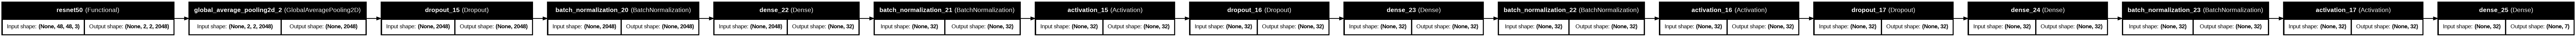

In [ ]:
# Install graphviz system package if missing
!apt-get install graphviz -y

# Install or upgrade pydotplus
!pip install --upgrade pydotplus

from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Change layout engine from 'dot' to 'neato' or 'fdp'
# These engines may handle complex graphs better
plot_model(model,
           to_file='convnet.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='LR',  # Optional: Change direction to Left-Right for better readability
           dpi=96,  # Adjust DPI for better resolution
           expand_nested=False)  # Consider setting to True to simplify the layout
Image(filename='convnet.png')

In [ ]:
import tensorflow as tf

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())
    return f1_val

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,verbose = 1,factor = 0.50, min_lr = 1e-10)

mcp = ModelCheckpoint('model.keras')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 60,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 75s 154ms/step - accuracy: 0.8542 - auc: 0.5874 - f1_score: 0.0145 - loss: 2.0007 - precision: 0.2113 - recall: 0.0076 - val_accuracy: 0.8571 - val_auc: 0.6309 - val_f1_score: 0.0000e+00 - val_loss: 1.8325 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.8568 - auc: 0.6306 - f1_score: 0.0013 - loss: 1.8441 - precision: 0.1879 - recall: 6.7785e-04 - val_accuracy: 0.8571 - val_auc: 0.6508 - val_f1_score: 0.0000e+00 - val_loss: 1.8129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.8571 - auc: 0.6371 - f1_score: 2.8459e-04 - loss: 1.8284 - precision: 0.2909 - recall: 1.4591e-04 - val_accuracy: 0.8571 - val_auc: 0.6538 - val_f1_score: 0.0000e+00 - val_loss: 1.8087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/60
359/359 ━━━━━━━━━━━

In [ ]:
def Train_Val_Print(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, f1, val_f1):
    # Find the best metrics and their corresponding epochs
    best_val_acc_idx = val_acc.index(max(val_acc))
    best_precision_idx = val_precision.index(max(val_precision))
    best_f1_idx = val_f1.index(max(val_f1))
    best_auc_idx = val_auc.index(max(val_auc))

    # Print the best results for each metric
    print("Best Validation Metrics:")

    print("\nBest Validation Accuracy:")
    print(f"Epoch: {best_val_acc_idx + 1}, Value: {val_acc[best_val_acc_idx] * 100:.2f}%")

    print("\nBest Validation Precision:")
    print(f"Epoch: {best_precision_idx + 1}, Value: {val_precision[best_precision_idx] * 100:.2f}%")

    print("\nBest Validation F1 Score:")
    print(f"Epoch: {best_f1_idx + 1}, Value: {val_f1[best_f1_idx] * 100:.2f}%")

    print("\nBest Validation AUC:")
    print(f"Epoch: {best_auc_idx + 1}, Value: {val_auc[best_auc_idx] * 100:.2f}%")

# Call the function with your data
Train_Val_Print(
    history.history['accuracy'],
    history.history['val_accuracy'],
    history.history['loss'],
    history.history['val_loss'],
    history.history['auc'],
    history.history['val_auc'],
    history.history['precision'],
    history.history['val_precision'],
    history.history['f1_score'],
    history.history['val_f1_score']
)


Best Validation Metrics:

Best Validation Accuracy:
Epoch: 1, Value: 85.71%

Best Validation Precision:
Epoch: 51, Value: 40.00%

Best Validation F1 Score:
Epoch: 51, Value: 0.07%

Best Validation AUC:
Epoch: 48, Value: 70.16%


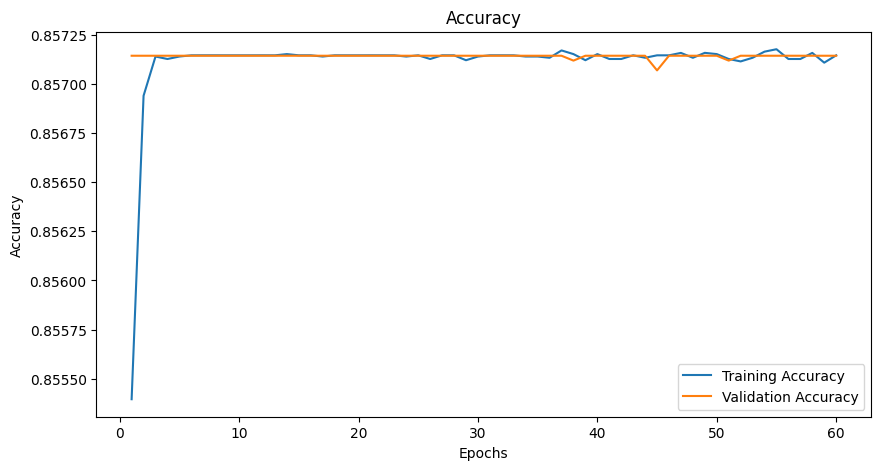

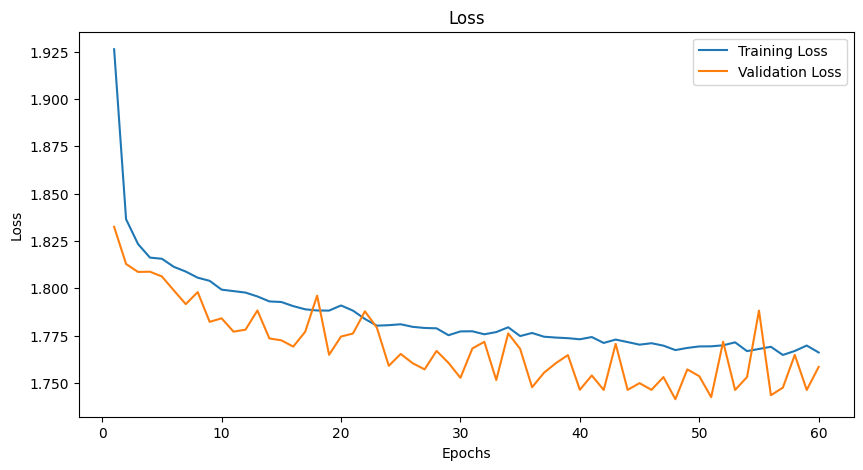

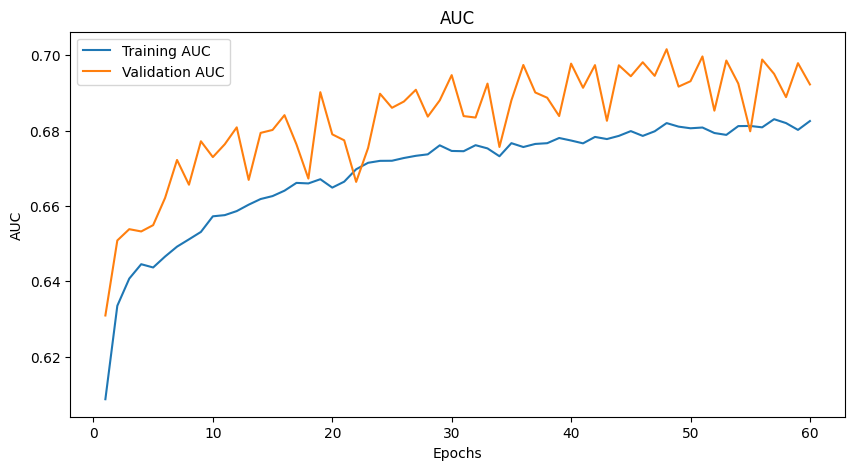

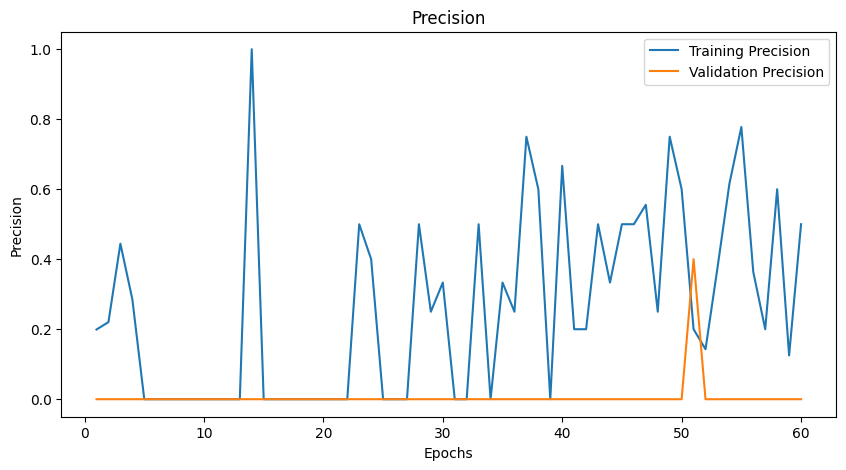

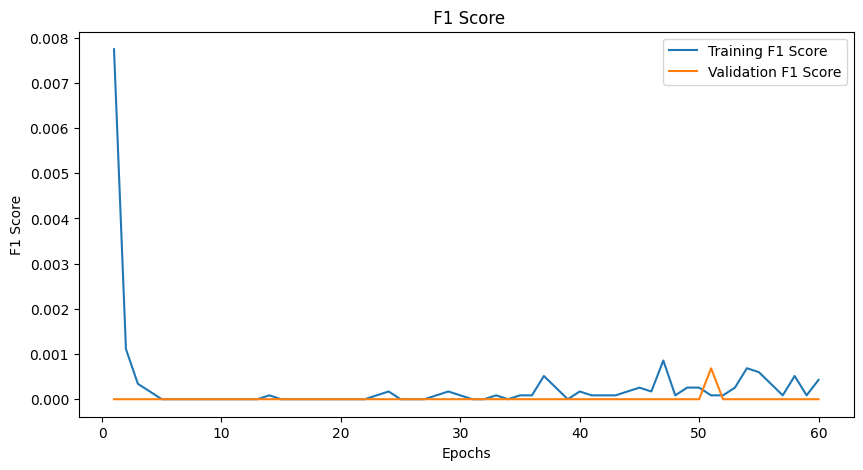

In [ ]:
import matplotlib.pyplot as plt

def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, f1, val_f1):
    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot AUC
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(auc) + 1), auc, label='Training AUC')
    plt.plot(range(1, len(val_auc) + 1), val_auc, label='Validation AUC')
    plt.title('AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()

    # Plot Precision
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(precision) + 1), precision, label='Training Precision')
    plt.plot(range(1, len(val_precision) + 1), val_precision, label='Validation Precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

    # Plot F1 Score
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(f1) + 1), f1, label='Training F1 Score')
    plt.plot(range(1, len(val_f1) + 1), val_f1, label='Validation F1 Score')
    plt.title(' F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()

# Call the function to plot the metrics
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
                history.history['loss'], history.history['val_loss'],
                history.history['auc'], history.history['val_auc'],
                history.history['precision'], history.history['val_precision'],
                history.history['f1_score'], history.history['val_f1_score'])


In [ ]:
model.save('resnet_model.h5')

In [ ]:
model.save('resnet_model.keras')